In [1]:
import pandas as pd
import seaborn as sns

In [2]:
simulation_data_file = "../gym_ACAS2D/models/logs/testing_ACAS2D_PPO_1048576_4_100.csv"

In [ ]:
# # REWARD CONSTANTS
# REWARD_GOAL = 1000
# REWARD_COLLISION = -1000

# def heading_reward(psi, phi, exp=4):
#     if (0 <= psi <= 360) and (0 <= phi <= 360):
#         return (1 - delta_heading(psi, phi) / 180) ** exp
#     else:
#         raise ValueError("Heading and relative angle must be in [0, 360].")


# def closest_approach_reward(v_closing, d_cpa, exp=4):
#     if v_closing > 0:
#         return 1
#     else:
#         return min(1, (d_cpa / SAFE_DISTANCE) ** exp)


# def distance_reward(d_goal, exp=4):
#     if d_goal >= 0:
#         d_goal_init = (WIDTH - GOAL_RADIUS) - (2 * AIRCRAFT_SIZE)
#         d_goal_max = d_goal_init + (AIRSPEED / FPS) * MAX_STEPS
#         return min(1, (1 - d_goal / d_goal_max) ** exp)
#     else:
#         raise ValueError("Distance to goal cannot be negative.")


# def step_reward(v_closing, psi, phi, d_cpa, d_goal):
#     if v_closing <= 0:
#         return heading_reward(psi, phi) * closest_approach_reward(v_closing, d_cpa)
#     else:
#         return heading_reward(psi, phi) * distance_reward(d_goal)

# def evaluate(self):

#     # reward = 0

#     psi = self.player.psi
#     phi = relative_angle(self.player.x, self.player.y, self.goal_x, self.goal_y)
#     v_closing = closing_speed(self.player, self.traffic[0])
#     d_cpa = distance_closest_approach(self.player, self.traffic[0])
#     d_goal = self.distance_to_goal()
#     # d_path = self.d_path

#     r_step = step_reward(v_closing, psi, phi, d_cpa, d_goal)

#     # Time discount factor
#     tdf = 1 - (self.steps / MAX_STEPS)
#     reward = r_step * tdf

#     # Penalise collisions.
#     if self.detect_collisions():
#         reward += REWARD_COLLISION

#     # Reward reaching the goal
#     if self.check_goal():
#         reward += REWARD_GOAL

#     # Accumulate episode rewards
#     self.total_reward += reward

#     return reward

In [3]:
simulation = pd.read_csv(simulation_data_file)

In [4]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [5]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [6]:
simulation.head()

,Episode,Outcome,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal,Path
0,1,Goal,1267.641464,686,822.0,171.683556,95.883139,"[(48, 400.0), (49.19734241916333, 400.07981936..."
1,2,Timeout,75.585735,1200,1438.8,153.716678,578.307821,"[(48, 400.0), (49.199751978442485, 399.9756034..."
2,3,Goal,1143.270837,859,1029.6,152.835710,95.703850,"[(48, 400.0), (49.1973576820695, 400.079590082..."
3,4,Goal,1385.978537,640,766.8,193.426407,95.619689,"[(48, 400.0), (49.19376156159086, 400.12220202..."
4,5,Goal,1213.320851,700,838.8,158.570188,95.812449,"[(48, 400.0), (49.199959352565244, 399.9901231..."


In [7]:
simulation.describe()

,Episode,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,1044.480589,815.060000,976.87200,157.997964,144.206024
std,29.011492,421.368701,197.032316,236.43878,14.597719,121.107347
min,1.000000,72.412088,639.000000,765.60000,135.262567,94.854150
25%,25.750000,1150.523838,681.000000,816.00000,148.888454,95.436932
50%,50.500000,1208.989391,721.000000,864.00000,156.376325,95.670301
75%,75.250000,1253.958846,846.000000,1014.00000,167.007260,95.927069
max,100.000000,1396.108302,1200.000000,1438.80000,198.558173,632.502714


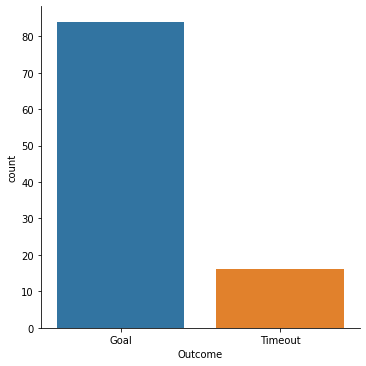

In [8]:
sns.catplot(x="Outcome", data=simulation, kind="count")

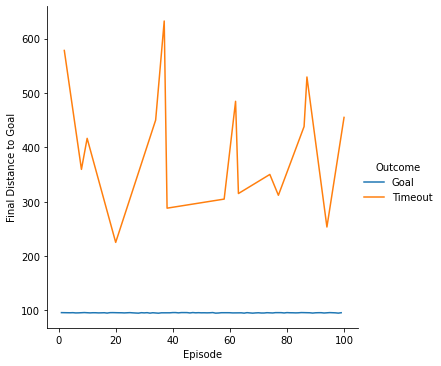

In [9]:
sns.relplot(x="Episode", y="Final Distance to Goal", data=simulation, 
            kind ="line", 
            hue="Outcome")

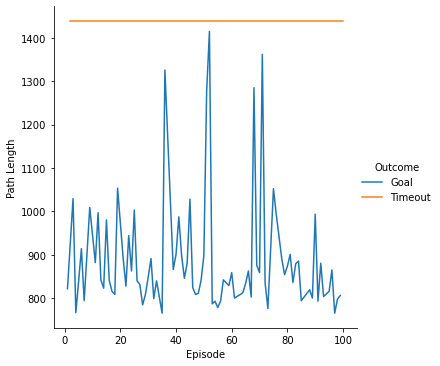

In [10]:
sns.relplot(x="Episode", y="Path Length", data=simulation, 
            kind ="line", 
            hue="Outcome")

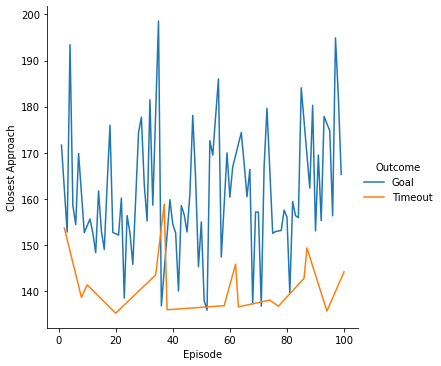

In [11]:
sns.relplot(x="Episode", y="Closest Approach", data=simulation, 
            kind ="line", 
            hue="Outcome")

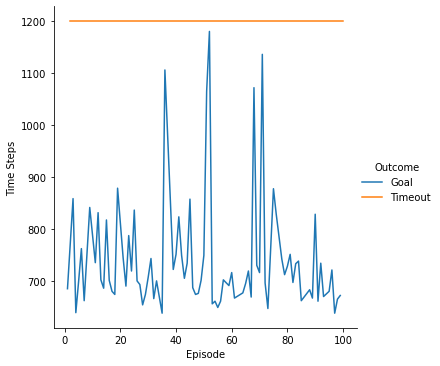

In [12]:
sns.relplot(x="Episode", y="Time Steps", data=simulation, 
            kind ="line", 
            hue="Outcome")

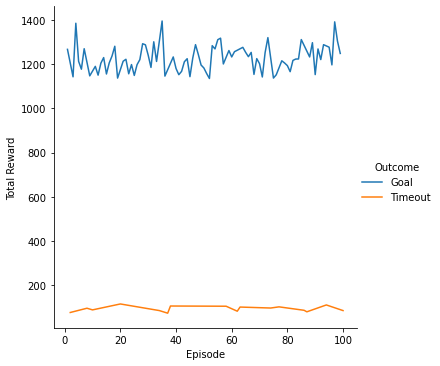

In [13]:
sns.relplot(x="Episode", y="Total Reward", data=simulation, 
            kind ="line", 
            hue="Outcome")

In [14]:
# Create paths dataframe

import ast

paths_df = pd.DataFrame()

e_values, o_values, x_values, y_values = [], [], [], []
for index, row in simulation.iterrows():
    for (x, y) in ast.literal_eval(row["Path"]):
        e_values.append(row["Episode"])
        o_values.append(row["Outcome"])
        x_values.append(x)
        y_values.append(-y)

paths_df["Episode"] = e_values
paths_df["Outcome"] = o_values
paths_df["x"] = x_values
paths_df["y"] = y_values

In [15]:
paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81506 entries, 0 to 81505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  81506 non-null  int64  
 1   Outcome  81506 non-null  object 
 2   x        81506 non-null  float64
 3   y        81506 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ MB


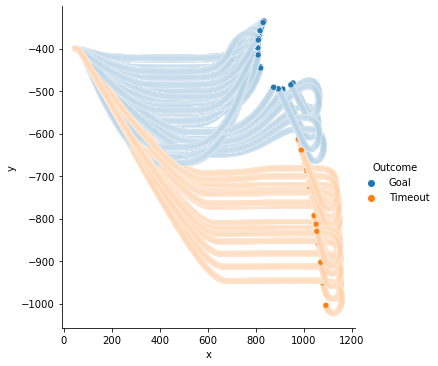

In [16]:
sns.relplot(x="x", y="y", hue="Outcome", kind="scatter", data=paths_df)

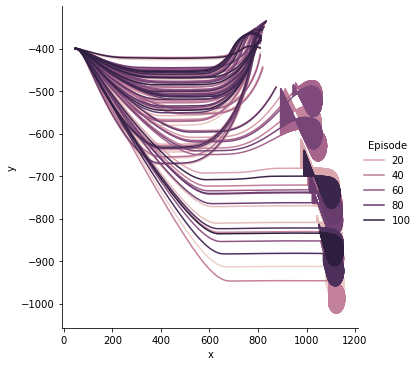

In [17]:
sns.relplot(x="x", y="y", hue="Episode", kind="line", data=paths_df)